# Test the generated results with noise

In [1]:
# Check that imports for the rest of the file work.
import tensorflow as tf
import tensorflow_gan as tfgan
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import time
import utils

%matplotlib inline
import matplotlib.pyplot as plt

from rnngan import LSTMTFGAN

import warnings
warnings.filterwarnings('ignore')

W1020 16:47:00.398959 29956 deprecation_wrapper.py:119] From C:\Users\jw855-admin\AppData\Local\conda\conda\envs\huawei\lib\site-packages\tensorflow_gan\python\contrib_utils.py:305: The name tf.estimator.tpu.TPUEstimator is deprecated. Please use tf.compat.v1.estimator.tpu.TPUEstimator instead.

W1020 16:47:00.398959 29956 deprecation_wrapper.py:119] From C:\Users\jw855-admin\AppData\Local\conda\conda\envs\huawei\lib\site-packages\tensorflow_gan\python\contrib_utils.py:310: The name tf.estimator.tpu.TPUEstimatorSpec is deprecated. Please use tf.compat.v1.estimator.tpu.TPUEstimatorSpec instead.

W1020 16:47:03.029175 29956 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please fi

In [2]:
# hyperparamters setting
# we set the buffer size as 100
hparams = tf.contrib.training.HParams(
            is_training=True,
            batch_size=50,
            buffer_size=1000,
            sequence_length=50,
            epoch=6000,
            noise_dim=5,
            num_units=128,
            gan_loss = 'min_max',
            d_lr=1e-4,
            g_lr=1e-3,
            generator_train_steps = 1,
            discriminator_train_steps = 5,
            interval=1200,
            num_eval=128
        )

train_sequence = utils.sine_wave_with_noise(seq_length=hparams.sequence_length, num_samples=hparams.buffer_size)
train_dataset = tf.data.Dataset.from_tensor_slices(train_sequence).shuffle(hparams.buffer_size).batch(hparams.batch_size)
iterator = tf.compat.v1.data.make_initializable_iterator(train_dataset)
real_sequence = iterator.get_next()

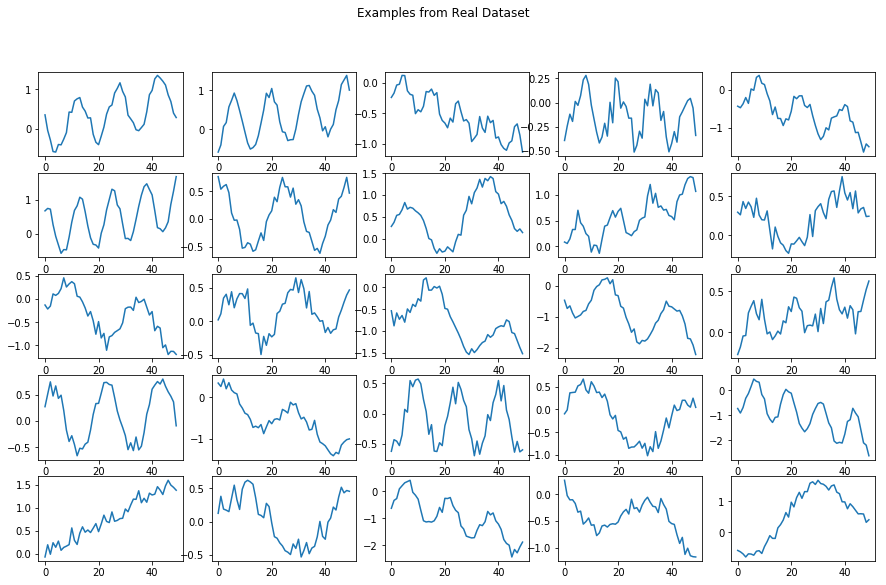

In [3]:
sess = tf.Session()
sess.run(iterator.initializer)
result = np.array(sess.run(real_sequence))

utils.plot_sample_sequence(result, 5, 5, fig_title='Examples from Real Dataset')

In [4]:
# Define the training model for RNNGAN
noise_input = tf.random_normal([hparams.batch_size, hparams.sequence_length, hparams.noise_dim])
seq_gan = LSTMTFGAN(train_dataset, noise_input, hparams)

W1020 16:47:34.255896 29956 deprecation_wrapper.py:119] From D:\Code\Deep-Generative-models\rnn-tf-gan\rnngan.py:18: The name tf.data.make_initializable_iterator is deprecated. Please use tf.compat.v1.data.make_initializable_iterator instead.

W1020 16:47:34.263874 29956 deprecation.py:323] From D:\Code\Deep-Generative-models\rnn-tf-gan\rnngan.py:22: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W1020 16:47:34.265870 29956 deprecation.py:323] From D:\Code\Deep-Generative-models\rnn-tf-gan\rnngan.py:26: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W1020 16:47:34.331720 29956 deprecation.py:506] From C:\Users\jw855-admin\AppData\Local\conda\con

W1020 16:47:41.323643 29956 deprecation_wrapper.py:119] From D:\Code\Deep-Generative-models\rnn-tf-gan\rnngan.py:95: The name tf.train.get_or_create_global_step is deprecated. Please use tf.compat.v1.train.get_or_create_global_step instead.

W1020 16:47:41.325638 29956 deprecation_wrapper.py:119] From D:\Code\Deep-Generative-models\rnn-tf-gan\rnngan.py:100: The name tf.train.SingularMonitoredSession is deprecated. Please use tf.compat.v1.train.SingularMonitoredSession instead.



Current loss: 5.943687
Training step: 0
Time since start: 0.023316 m
Steps per min: 0.000000


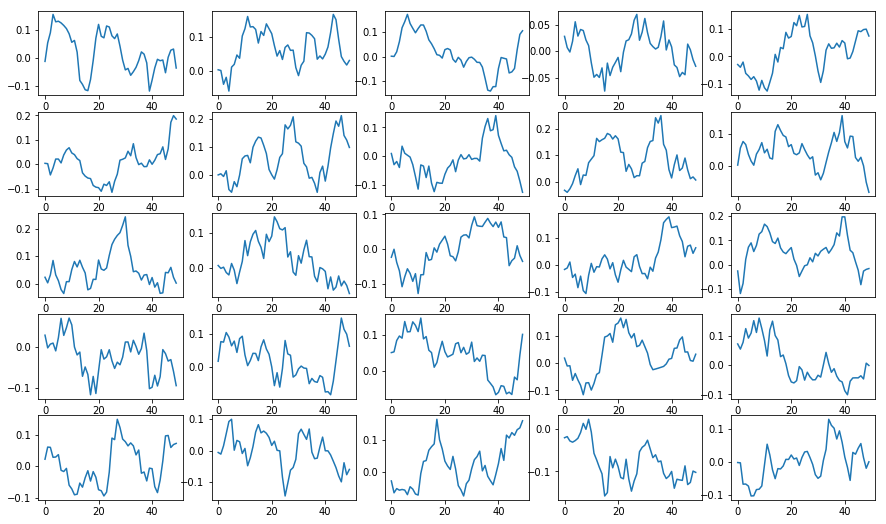

Current loss: 5.119461
Training step: 5994
Time since start: 31.934223 m
Steps per min: 187.698319


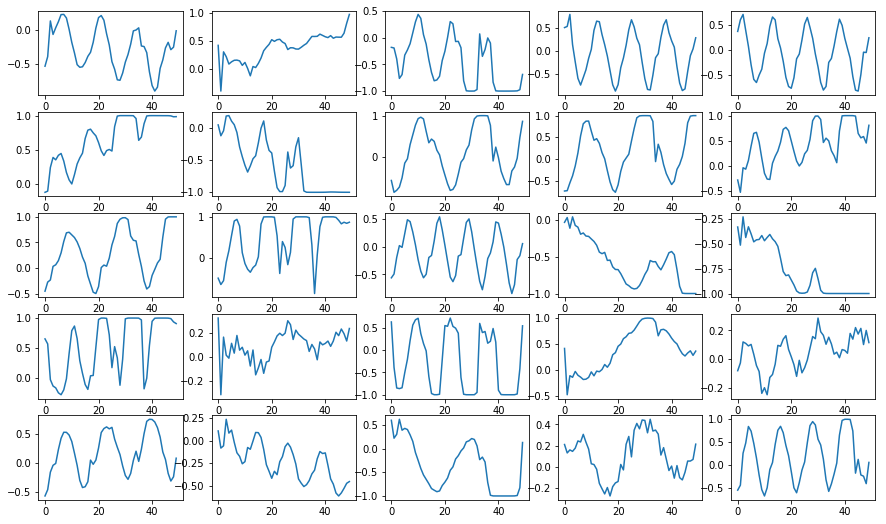

Current loss: 4.552498
Training step: 11994
Time since start: 64.754140 m
Steps per min: 185.223679


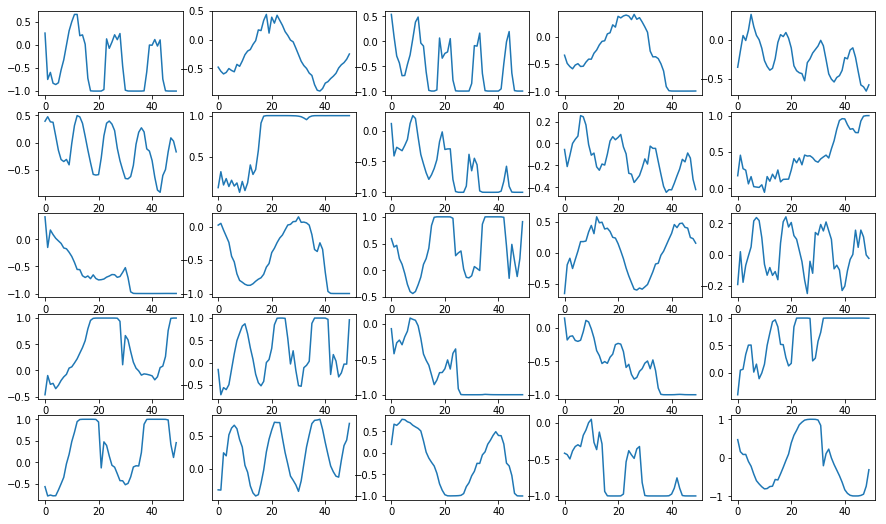

Current loss: 4.239503
Training step: 17994
Time since start: 142.321767 m
Steps per min: 126.431820


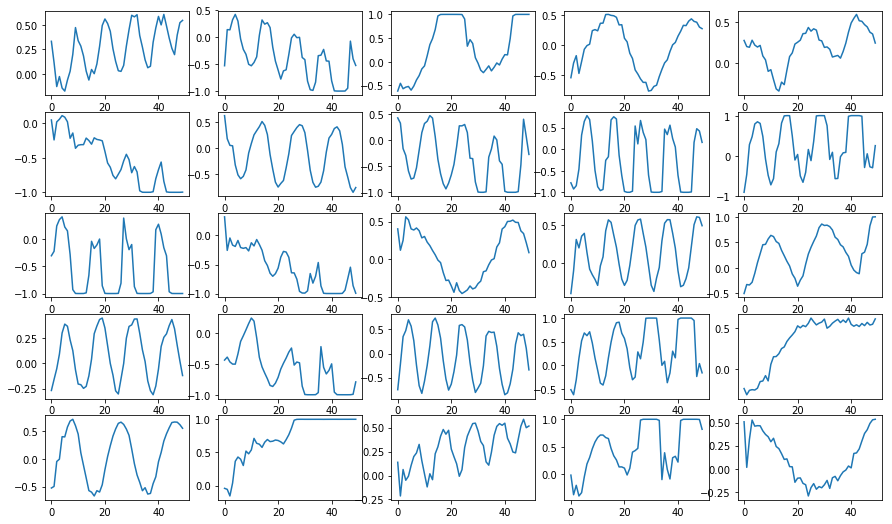

Current loss: 4.116977
Training step: 23994
Time since start: 174.061352 m
Steps per min: 137.847947


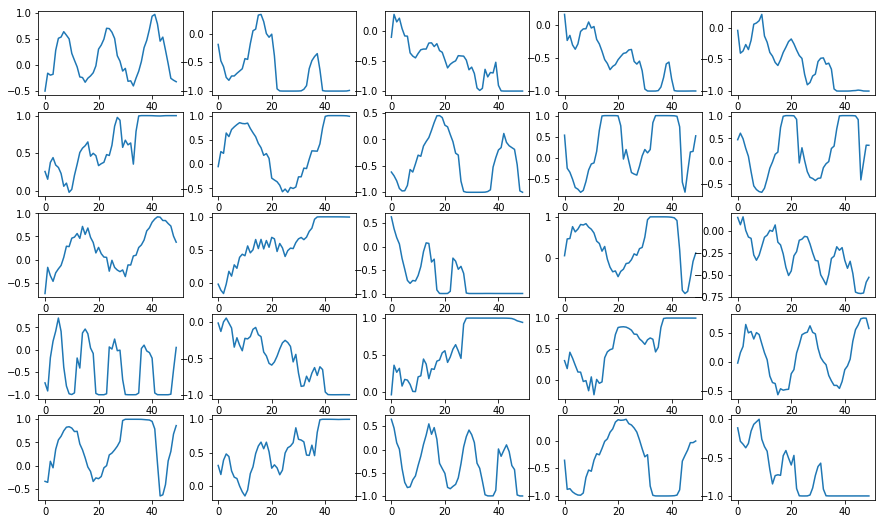

Current loss: 3.770785
Training step: 29994
Time since start: 205.912238 m
Steps per min: 145.663999


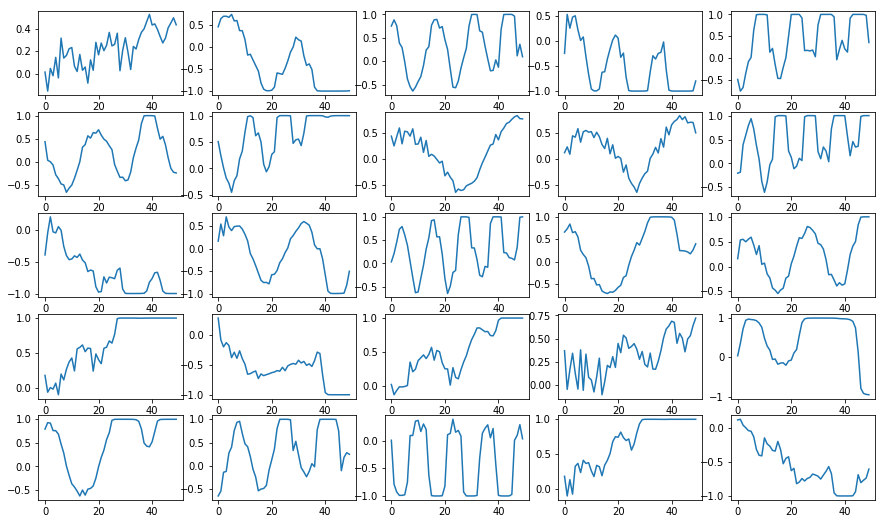

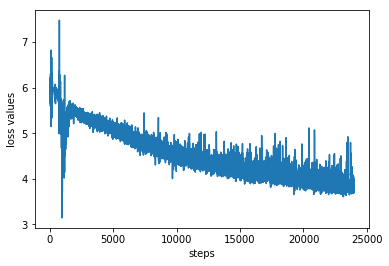

In [5]:
seq_gan.train(visualization=True)